In [1]:
import numpy as np
import hashlib

### Task 1 - Binary Representations
<hr>

Rotating bits refers to shifting bits in a direction, but instead of dropping the shifted bits, appending them to the other end of the integer.
For example, 01010101 rotated by 1 to the right will become 10101010.

This is done in **rotl** using bitwise operations like >> and |.
It iterates over the last n few bits in the binary representation of the number, and adds all of them to a string.
This string is then converted back into an integer, and appended to the start of the bits.
- This is done by shifting the bits to append by the number of bits in the original number. So for example if the bits to append are 110, and the number of bits in the original number 10, 10 zeroes are added to the end of appendBits.
- Then, this is OR'd against the original number right-shifted by n, the last few bits removed to be added on.
- This creates a binary number with the rotated bits at the start, followed by the original bits minus the bits rotated from the end.

In [2]:
def rotl(x, n): # Rotate the bits to the left by n
    print(f"Before Rotation: 0b{x:032b}")
    s = "0b" # Keeps track of the rotated bits to be appended to the start.


    for i in range(n):
        rotatedBit = (x >> i) & 1 # Bit at the rightmost position of the number currently.
        s = s + (str)(rotatedBit) # Add that bit to the strng.

    appendBits = int(s, 2)

    # len(bin(x))-n+2 gives the length of the binary number without the prefix or the rotated bits.
    result = (appendBits << (len(bin(x))-(n+2))) | (x >> n) # [1], appending bits to the start of a binary number.

    return result

y = rotl(222, 3)
print(f"After Rotation: 0b{y:032b}")

Before Rotation: 0b00000000000000000000000011011110
After Rotation: 0b00000000000000000000000001111011


rotr is similar, but it uses a more efficient way of doing things. This is to demonstrate the different ways bitwise operators can be used.

In rotr, the rightmost bits are extracted and then appended to the front of an empty binary number the same length as the original.
This is then OR'd against the original number which has been bitshifted by the required amount of bits.
This generates the same aresult (though rotating to the right instead of the left).

In [3]:
def rotr(x, n): # Rotate the bits to the right by n
    print(f"Before Rotation: 0b{x:032b}")
    
    right_bits = x & ((1 << n) - 1) # Get the rightmost n bits.
    shifted = x >> n # Shift the original number to the right.
    
    rotated = right_bits << (len(bin(x)) - n - 2) # Place the extracted bits on the left side.

    result = shifted | rotated # Combine the two to get the result.

    return result


y = rotr(2423, 3)
print(f"After Rotation: 0b{y:032b}")

Before Rotation: 0b00000000000000000000100101110111
After Rotation: 0b00000000000000000000111100101110


**xANDy** is fairly simple. Where X and Y are both 1, **xANDy** has a 1. Else, a 0.
**zANDNOTx** is a little more complicated. First, x is flipped, meaning every 0 becomes a 1 and vice versa.
Then, x is AND'd with z. Together, this means that each bit at **zANDNOTx** corresponds to a 0 in x and a 1 in z. (0 from x as it would be flipped into a 1 before being AND'd.)

Finally, xANDy is OR'd with zANDNOTx. This means that at each bit in the result, it's a 1 if that bit at X and Y is a 1 OR if that bit is 0 in z and 1 in x (or vice versa). Otherwise, it's a zero.

For example: Consider x as 1010, y as 1100, and z as 1111.
- The result for xANDy will be 1000, as only the first bit has both x and y at 1.
- The result for zANDNOTx will be 0101, as both the second and fourth positions have different bits in z and x.
- ORing these two binary numbers gives us 1101, our final result for ch().

In [4]:
def ch(x,y,z): # Choose the bits from y where x has bits set to 1, and bits in z where x has bits set to 0
    xANDy = x & y
    print(bin(xANDy))
    zANDNOTx = ~x & z # ~ is the NOT operator, meaning that x is flipped.
    print(bin(zANDNOTx))
    return xANDy | zANDNOTx

print(bin(ch(0b1010, 0b1100, 0b1111)))

0b1000
0b101
0b1101


maj() is fairly simple - it is done using only AND + OR. First we get the three different ANDs, x&y, x&z, y&z. 
Let's use these for the example: x=101010, y=100011, z=110001
This tells us what each variable has in common at each position. With x&y, we can see that both have 1s at the first position - so there are two "votes" for 1 already.
This gives us the following for each:
- x&y = 100010
- x&z = 100000
- y&z = 100001

Now to find out what the "winner" of the vote in each position is, we OR all three of these against each other. This is because any position in any of the above AND results means that two numbers "agree" on a 1 being at that position, so we can safely say that there is a 1 at that position.
- In this example, the result for maj(x,y,z) is 100011. At each 1 in this number, at least 2 of x,y,z "agree" on there being a 1 at that position.

In [5]:
def maj(x,y,z): # Takes a majority vote of the bits in x,y,z. Output should have 1 in the position where at least two of x,y,z have 1.

    # Simply AND the bits in each combination of x,y,z.
    xANDy = x & y
    print(bin(xANDy))
    xANDz = x & z
    print(bin(xANDz))
    yANDz = y & z
    print(bin(yANDz))

    return xANDy | xANDz | yANDz # OR them all together to get the final result

print(bin(maj(0b101010, 0b100011, 0b110001)))

0b100010
0b100000
0b100001
0b100011


### Task 2 - Hash Functions
<hr>

Python version of the hash(char *s) function from *The C Programming Language*. 
Takes in a string, and returns a number (the hash of that string).
Starts out by creating a hashval starting at 0, then iterates over every character in that string.
Sets the hashval to the ASCII value of the character, plus 31 times the current value of hashval
Finally, returns the value of hashval mod 101. This is the hash value of the string.

Using "hello" as an example...
- h -> 104. As hashval starts at zero, nothing is added to it.
- e -> 101. Hashval now equals 101 + 31 * 104. (3325)
- l -> 108. Hashval now equals 108 + 31 * 3325. (103183)
- l -> 108. Hashval now equals 108 + 31 * 103183. (3198781)
- o -> 111. Hashval now equals 111 + 31 * 3198781. (99162322)
- The final value of hashval is then mod'd against 101, resulting in 99162322 mod 101, aka 17, our final result.


The numbers 31 and 101 were not chosen for any particularly known reason - they were just what worked best at creating the hash value. They are both relatively low prime numbers, so they're easy to remember as constants and 

In [6]:
def hash(s):
    hashval = 0
    for i in range(len(s)):
        hashval = ord(s[i]) + 31 * hashval # [2] - ord() gets the ASCII value of a given character.
    return hashval%101

print(hash("hello"))

17


### Task 3 - SHA256
<hr>

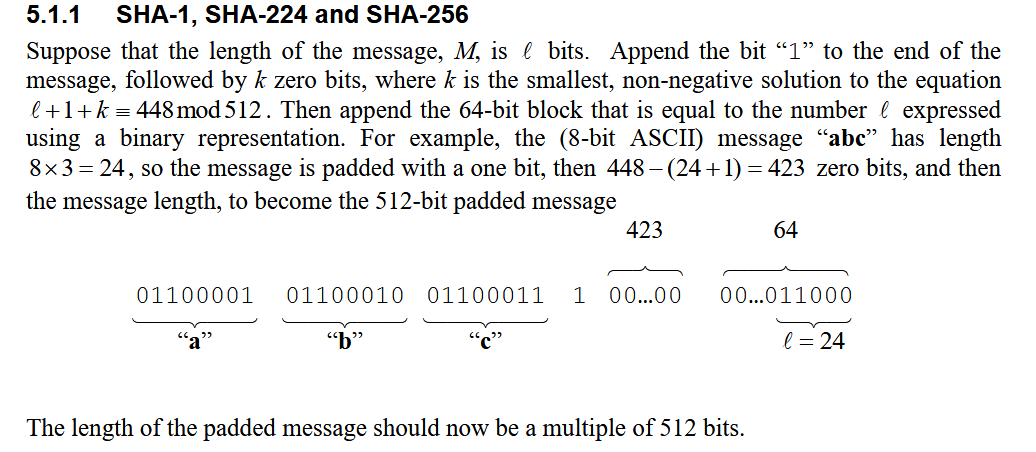

File could be bigger than 512 bits. Only print the last block & add the padding to it, going into another block if necessary.

First, I will do some operations to split my file into 512 bit sized chunks, by encoding it and counting the number of bits. I encode it in utf-8 to make sure I have a consistent idea of how many bytes each character makes up, making it reliable to calculate how many bits are in a file.

I also save the whole message in binary, and the amount of bits in the mesasge, for later use. The bit of code  `'{:>0512b}'.format(int.from_bytes(str)` just converts a string into it's binary representation. This includes any leading zeroes, which are necessary for getting an accurate number of bits and ensuring that every block is 512 bits long.

In [7]:
f = open("sha256.txt", "r", encoding='utf-8') # [3] - open the file with an encoding method.

file = f.read().encode('utf-8')

# Use a list comprehension to split the bytes into chunks with a size of 64 (64 bytes = 512 bits)
whole_message_bits = '{:>0b}'.format(int.from_bytes(file)) # Convert the bytes to an integer, then to binary.
message_length = len(whole_message_bits)
blocks = ['{:>0b}'.format(int.from_bytes(file[i:i+64])) for i in range(0, len(file), 64)] # [4] - List comprehension for splitting an array into chunks

print("Blocks: ", len(blocks))
print("Bit Length: ",message_length)
print("Whole Message: ", whole_message_bits)

Blocks:  1
Bit Length:  87
Whole Message:  110100001100101011011000110110001101111001000000111011101101111011100100110110001100100


Now, we can start appending bits to the end of the last block to pad it out to 512.
To do this, according to the specification in the image above, we need to figure out:
- *k*, via the formula *k* = 448mod512-*l*-1
- A binary representation of l, the length of the message.

With these parts, we append 1, then *k* zeroes, then the binary representation of *l*, and our bit length *should* come out to 512.

In [8]:
last_block_length = len(blocks[-1]) # Length of only the last block.
k = (448%512) - last_block_length - 1 # k is the number of zeroes to be added to the end of the message.
l = '{:064b}'.format(last_block_length) # Length of the message in bits.
print(f"K: {k}, L: {last_block_length}")
print(f"Last Block: \t\t{blocks[-1]}")

# Add the 1 bit to the end of the message, followed by k zeroes, and then the length of the message in bits.
padding = '1' + '0' * k + l # The complete padding to apply.
blocks[-1] = blocks[-1] + padding
print(f"Last Block, Padded: \t{blocks[-1]}")
print(f"Last Block Length: \t{len(blocks[-1])}")

K: 360, L: 87
Last Block: 		110100001100101011011000110110001101111001000000111011101101111011100100110110001100100
Last Block, Padded: 	11010000110010101101100011011000110111100100000011101110110111101110010011011000110010010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001010111
Last Block Length: 	512


For this task though, the important part is just the padding, which we want to display in hex for demonstration purposes. This just requires converting to hex.

In [9]:
# Add padding to ... the padding.
# This is necessary because otherwise the below hex_string conversion will not work properly.
if len(padding) % 4 != 0:
    padding = '0' * (4 - (len(padding) % 4)) + padding # Pad the string to make it a multiple of 4 bits.

# Convert padding to hex.

# Divide the string into 4-bit chunks and convert each chunk to hex.
# The below comprehension takes 4 bit chunks and converts them to an integer, then to hex.
hex_string = ''.join([hex(int(padding[i:i+4], 2))[2:] for i in range(0, len(padding), 4)])


# Should print this out in a nice format, so add a space between each hex value:
hex_string = ' '.join(hex_string[i:i+2] for i in range(0, len(hex_string), 2))
print(f"Hex String: {hex_string}") # Print the hex string in a nice format.

Hex String: 10 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 05 7


This hex string is the final result - it is a hexadecimal representation of the padding added to a SHA256 message.

### Task 4 - Prime Numbers
<hr>

There are several different algorithms for finding prime numbers, and several of them will be compared below.

First, brute force. This is not much of an algorithm but rather just iterating over every single number and checking if it's prime or not.

This is done with this piece of code:
```python
for j in range((int)(np.sqrt(i))):
    if i % (j+1) == 0 and (j+1) != 1:
        prime = False
```
i is the current number. Every number from 0 to the square root of i is checked against i, to see if it's a factor of that number (1 is excepted from this). If a factor is found, we know that i isn't prime. If a factor isn't found, then we know it must be prime and we can add it to a list.

```python
if prime:
    primes.append(i)
```

In order to find a certain number of primes, ``` while len(primes) <= n+1```is used, which keeps the algorithm going until n primes are found.

In [10]:
def isPrimeBruteForce(n): # Brute Force
    primes = []

    i = 0
    while len(primes) <= n+1 : # Continue this process until n prime numbers are found.
        prime = True

        for j in range((int)(np.sqrt(i))): # Check every number from 0-sqrt(i)
            if i % (j+1) == 0 and (j+1) != 1: # If it's a factor of i, then i's not prime.
                prime = False

        if prime:
            primes.append(i) # If i remains true by this point, the number must be prime.
        i += 1

    return primes

%timeit isPrimeBruteForce(100) #1.82ms.


2.01 ms ± 16.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


This isn't a very efficient way of doing things, though. It takes 1.82ms to run, and if n is increased it can quickly get out of control. There are better ways of achieving this.

**Sieve of Eratosthenes** [5]

The Sieve of Eratosthenes is an ancient algorithm designed to find prime numbers efficiently with a complexity of o(nloglogn). Once we've got some of the smaller prime numbers, we mark off all of their multiples as we know they cannot be prime. Then once we get to a number that's not marked off, we know it must be prime. 

In [11]:
# This is a translation of the Implementation section of [5] into Python.
def sieveOfEratosthenes(n):
    primes = []
    is_prime = [True] * (n+1) # Create a list of true values.

    for i in range(2, n+1):
        if(is_prime[i] and i * i <= n): # If the current number is a prime number...
            for j in range (i*i, n+1, i): # Mark all multiples of that prime number as false.
                is_prime[j] = False

        if(is_prime[i]): # Now if we come across a number and it's still True, we can be sure it's prime.
            primes.append(i)

    return primes

%timeit sieveOfEratosthenes(542)

primes = sieveOfEratosthenes(542)
print(primes)

83.9 µs ± 2.52 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541]


We can know that the time complexity of this is O(nloglogn) by looking at the number of loops. It iterates n times, but will only go into the ```for j in range (i*i, n+1 i)``` loop if it's one of the first few prime numbers - this is done via the ```i*i <= n``` in the if statement, checking that the prime squared is less than n.

**Sieve of Atkin** [9]
The Sieve of Atkin is a more modern approach with a complexity of O(n/loglogn). This is better than the complexity of the Sieve of Eratosthenes, but comes with a higher overhead meaning that it may end up having a slower runtime at lower inputs. This higher overhead originates from all of the complex operations being done, with a large amount of division and multiplication being done in every conditional.

In [12]:
def sieveOfAtkin(n): # [9]
    primes = []
    is_prime = [False] * (n+1) # Create a list of false values.

    for x in range(1, int(np.sqrt(n)) + 1):
        for y in range(1, int(np.sqrt(n)) + 1):
            # First condition:
                # If 4x^2 + y^2 is prime, then flip the value of is_prime[4x^2 + y^2]
                # Checks if 4x^2 + y^2 is less than or equal to n and if it's remainder is 1 or 5 when divided by 12.
            if (4 * x**2 + y**2 <= n) and ((4 * x**2 + y**2) % 12 == 1 or (4 * x**2 + y**2) % 12 == 5):
                is_prime[4 * x**2 + y**2] = not is_prime[4 * x**2 + y**2]

            # Second condition
                # If 3x^2 + y^2 is prime, then flip the value of is_prime[3x^2 + y^2]
                # Checks if 3x^2 + y^2 is less than or equal to n and if it's remainder is 7 when divided by 12.
            if (3 * x**2 + y**2 <= n and (3 * x**2 + y**2) % 12 == 7):
                is_prime[3 * x**2 + y**2] = not is_prime[3 * x**2 + y**2]

            # Third condition
                # If 3x^2 - y^2 is prime, then flip the value of is_prime[3x^2 - y^2]
                # Checks if 3x^2 - y^2 is less than or equal to n and if it's remainder is 11 when divided by 12.
                # Also checks for negative numbers with x > y.
            if (3 * x**2 - y**2 <= n and x > y and (3 * x**2 - y**2) % 12 == 11):
                is_prime[3 * x**2 - y**2] = not is_prime[3 * x**2 - y**2]

    # mark all multiples of square of primes as non-prime
    for p in range(5, int(np.sqrt(n)) + 1):
        if is_prime[p]:
            for k in range(p*p, n+1, p*p):
                is_prime[k] = False

    # We know 2 & 3 are prime, so we just add them to the list.
    primes.append(2)
    primes.append(3)

    # Add all the other primes to the list, starting from 5 (as we already added 2 & 3).
    for p in range(5, n+1):
        if is_prime[p]:
            primes.append(p)

    return primes

%timeit sieveOfAtkin(542) 
primes = sieveOfAtkin(542)
print(primes)

555 µs ± 1.64 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541]


As you can see, Sieve of Atkin has a higher running time at this lower level of input. With more input, though it may end up faster.

### Task 5 - Roots
"Calculate the first 32 bits of the fractional part of the square roots of the first 100 prime numbers"
<hr>

This is used in the Secure Hash Standard for the initial hash value of SHA256. The roots of the first 8 prime numbers were taken, then the hex value of the first 32 bits of the fractional part of that root. SHA384 uses the next 8 prime numbers, while SHA512 takes 64 bits instead of 32 from the same first 8 roots.

Each of these can be calculated the same way, given a list of primes:
* Take the square root of the current prime.
* Isolate the fractional part of it. This is done in the below code by taking the floor of the sqroot and taking it away from the sqroot.
```python 
floor = np.floor(sqroot)
frac = sqroot - floor
```

* Now, move however many bits as necessary in front of the decimal place. frac*2**32 is used to move 32 bits, but this can be changed easily for 64 bits.
* Finally, the bits can be converted back into an integer and apppended to a list.

The results of the below code match the constants found in the Secure Hash Standard, section 5.3.3:

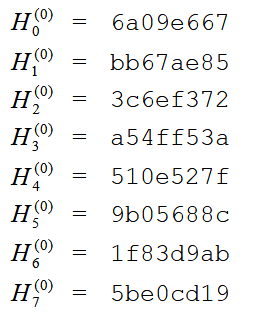

In [13]:
first32bits = []

for prime in primes: # This is adapted from the lecture notes [6], to work with square roots instead of cube roots.
    # Square Root
    sqroot = np.sqrt(prime)
    floor = np.floor(sqroot)
    frac = sqroot - floor # The fractional part is the sqroot - the floor, giving us everything after the decimal point.

    # Move 32 bits in front of the decimal point.
    frac = frac * 2**32

    bits = int(frac)

    first32bits.append(bits)

for prime, bits in zip(primes, first32bits):
    # Only print first 5 & last 5, for ease of reading.
    if prime < 13 or prime > 500:
        print(f"{prime}\t -> Hex: {bits:08x} \t Binary: {bits:032b}")



2	 -> Hex: 6a09e667 	 Binary: 01101010000010011110011001100111
3	 -> Hex: bb67ae85 	 Binary: 10111011011001111010111010000101
5	 -> Hex: 3c6ef372 	 Binary: 00111100011011101111001101110010
7	 -> Hex: a54ff53a 	 Binary: 10100101010011111111010100111010
11	 -> Hex: 510e527f 	 Binary: 01010001000011100101001001111111
503	 -> Hex: 6d7b3939 	 Binary: 01101101011110110011100100111001
509	 -> Hex: 8f9f8dbb 	 Binary: 10001111100111111000110110111011
521	 -> Hex: d34f03cd 	 Binary: 11010011010011110000001111001101
523	 -> Hex: de8372ef 	 Binary: 11011110100000110111001011101111
541	 -> Hex: 42687a39 	 Binary: 01000010011010000111101000111001


### Task 6 - Proof of Work
"Find the words in the English language with the greatest number of 0 bits at the beginning of their SHA256 Hash Digest"
<hr>

**Proof of Work** is a concept where a computer must solve a difficult problem in order to prove something has been done - often used to limit a machine from being able to perform a task many times at once.

It is most well known for its use in **Email** (hash-cash, specifically: [11]) where it is used to prevent servers from being able to send millions of emails at once, and in **Cryptocurrency** where it is used to mine new tokens. An increasingly difficult-to-solve problem makes the currency increasingly rarer.

Proof of work needs to be something computationally difficult to calculate, but easy for other computers to verify the results of. In Bitcoin for example, miners verify each other's work. The results of a computation must be validated before a new bitcoin can be mined.

First, we open and retrieve a list of english words (I've used the one provided previously in last semester's Emerging Technologies module).
This is as simple as opening the file and appending each line to a list.

In [14]:
# Open words.txt (from EmTech) and read the words into a list.
words = []
with open("words.txt", "r", encoding='utf-8') as f:
    for line in f:
        words.append(line.strip())

Next, the words are hashed via SHA256, using hashlib. These are appened to a hashes list for later use.

In [15]:
# List of Words -> List of Hashes.
hashes = []
for word in words:
    hashes.append(hashlib.sha256(word.encode('utf-8')).hexdigest()) # [10] - Hash the word using SHA256.

Now the below for loop iterates through each of the hashes, converting them to binary using `bin(int(hashes[i], 16)[2:].zfill(256))`.
It then checks these binaries for leading zeroes, and counts the number of leading zeroes in each binary representation.
The one with the most leading zeroes ie kept track of, and printed at the end.

In [16]:
max_zeroes = 0
max_zeroes_index = 0
# Show the hashes in binary
for i in range(len(hashes)):
    binary_hash = bin(int(hashes[i], 16))[2:].zfill(256) # Convert the hex to binary, and add leading zeroes to make it 256 bits if necessary.
    hashes[i] = binary_hash
    
    # Keep track of max number of leading zeroes.
    if hashes[i].startswith("0"):
        # Count the number of leading zeroes by removing the length of the string without the leading zeroes.
        leading_zeroes = len(hashes[i]) - len(hashes[i].lstrip('0b').lstrip('0'))
        
        # Set new max.
        if leading_zeroes > max_zeroes:
            max_zeroes = leading_zeroes
            max_zeroes_index = i
    
print(f"Highest Leading Zeroes: {max_zeroes}\nWord: {words[max_zeroes_index]}\nHash: {hashes[max_zeroes_index]}")

Highest Leading Zeroes: 16
Word: APPLICANT
Hash: 0000000000000000110010100000000110101101110010010111001111000010101001011010100011100110101000110000000100110100111100000111001110010110110100001000100010110110110101100101000000100101001010010010111101101111111110010111101100100011011111001010101101001101


The word with the highest number of leading zeroes for the given words.txt was APPLICANT, with sixteen.

A calculation like this can be used to provide proof of work for cryptocurrencies. For example, a task may be "Generate a string that results in at least 40 leading zeroes in a SHA256 digest". This would be an incredibly difficult task computationally, but would also be easily verifiable by other computers, making it an ideal proof of work.

### Task 7 - Turing Machines
<hr>

This is a turing machine built to add 1 to a binary number. That is, 10110 should become 10111 and 10111 should become 11000. 

Turing machines define what a computer should be able to do, in their most basic and abstract form. The below cells of code create an emulation of this basic form of computing, to demonstrate how turing machines operate.
A machine for binary addition and for parity checking have been included, two basic operations on binary numbers that can be performed easily with a turing machine.

In [17]:
pos = 0
test_tapes = [ "_", "1_", "0_", "1011010_", "1001010111_"]

This is a basic state table for binary addition, with some additional state to assist with edge cases (an empty or size 1 tape).

To best explain it, here is an explanation of how the tape will progress with the tape 1011010_.
- The machine starts in the "U" state. This moves the tape head to the right on 0s and 1s, until it gets to the end of the tape.
- Then, it switches to the V state and starts going back the tape (to the left).
- In this state, it will turn the first 0 it finds into a 1 and enter the W state. If it finds a 1, it will turn it into a 0 and continue in the V state, moving left.
    - If it reaches the start of the tape in the V state, that means the tape was likely empty or of size 1. It will change the start of the tape to a 1 and complete.
- Once it enters the W state, it means that it has added 1 to the binary number and will continue back to the start of the tape and accept.

Basically, this machine goes from the back of the tape until it adds a 1 (by changing a 0 to a 1, and changing 1s to 0s along the way) and then completes afterwards.

In [18]:
# Add 1
state_table = {
    ("U", "0"): ("U", "0", "R"),
    ("U", "1"): ("U", "1", "R"),
    ("U", "_"): ("V", "_", "L"),
    
    ("V", "0"): ("W", "1", "L"),
    ("V", "1"): ("V", "0", "L"),
    ("V", "_"): ("A", "1", "R"),
    
    ("W", "0"): ("W", "0", "L"),
    ("W", "1"): ("W", "1", "L"),
    ("W", "_"): ("A", "_", "R")
}

Functions for navigating over the tape.

l() moves to the left by one position. If it goes past the start of the tape, it'll prefix a _.
r() is similar - it moves to the right by one position. If it goes past the end of the tape, it'll affix a _.

The initial state for this machine is U, moving right. The final state should be accept - there is no condition in which a tape will be rejected.

In [19]:

# Navigate to the left by one cell
def l():
    global pos, tape
    pos -= 1
    if pos < 0:
        pos = 0
        tape = ["_"] + tape

# Navigate to the right by one cell
def r():
    global pos, tape
    pos += 1
    if pos >= len(tape):
        tape = tape + ["_"]

initial_state = "U"
final_state = ["A"]

Run the turing machine. A list of different tapes has been used for demonstration purposes, which is being iterated over in this program.

While the state isn't in the final state (A), the machine gets the current symbol, and uses that to get the new state, symbol and direction from the state table. it then moves the tape head in the specified direction and updates the tape.

In [20]:
def run():
    global pos, tape
    states = []
    for tape in test_tapes:
        tape = list(tape)
        print(f"Initial Tape: {tape}")
        state = initial_state # Set the state to the starting one

        # Continue until accepted/rejected (A or R).
        while state not in final_state:
            symbol = tape[pos] # Get 0/1 at current position of the tape

            # Get the new state, symbol and direction from the state_table.
            new_state, new_symbol, direction = state_table[(state, symbol)]
            tape[pos] = new_symbol # Set the current position to the new symbol.

            # Move the tape as specified.
            if direction == "R":
                r()
            else:
                l()

            state = new_state # Take on the new state.

        states.append(state)
        print(f"Final Tape: {tape}\n")

run()

Initial Tape: ['_']
Final Tape: ['1', '_']

Initial Tape: ['1', '_']
Final Tape: ['1', '0', '_']

Initial Tape: ['0', '_']
Final Tape: ['_', '1', '_']

Initial Tape: ['1', '0', '1', '1', '0', '1', '0', '_']
Final Tape: ['_', '1', '0', '1', '1', '0', '1', '1', '_']

Initial Tape: ['1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '_']
Final Tape: ['_', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '_']



### Parity Check Machine
The below code block is stored here for reference purposes. The code was written along during a lecture and was then used as a template for implementing a binary addition state table.

It is a parity check machine, **Accepting** a tape if the number of 1s on the tape is even, and **Failing** it if not. For example, the tape `10110111` will be accepted, as it contains six 1s. The tape 1011101 will fail, though, as it contains 5.


In [21]:
# Parity Check
# Start at position zero with an empty tape
pos = 0
tape = "10110111"
#tape = "1011011"

state_table = {
    ("U", "0"): ("U", "0", "R"),
    ("U", "1"): ("V", "1", "R"),
    ("U", "_"): ("A", "_", "L"),
    ("V", "0"): ("V", "0", "R"),
    ("V", "1"): ("U", "1", "R"),
    ("V", "_"): ("F", "_", "L")
}

# Navigate to the left by one cell
def l():
    global pos, tape
    pos -= 1
    if pos < 0:
        pos = 0
        tape = ["_"] + tape

# Navigate to the right by one cell
def r():
    global pos, tape
    pos += 1
    if pos >= len(tape):
        tape = tape + ["_"]

initial_state = "U"
final_state = ["A", "F"]

def run():
    global pos, tape
    tape = list(tape)
    state = initial_state # Set the state to the starting one

    # Continue until accepted/rejected (A or R).
    while state not in final_state:
        symbol = tape[pos] # Get 0/1 at current position of the tape

        # Get the new state, symbol and direction from the state_table.
        new_state, new_symbol, direction = state_table[(state, symbol)]
        tape[pos] = new_symbol # Set the current position to the new symbol.

        # Move the tape as specified.
        if direction == "R":
            r()
        else:
            l()

        state = new_state # Take on the new state.

    return state

run()

'A'

### Task 8 - Computational Complexity
<hr>

BubbleSort is a rather inefficient sorting algorithm that is moreso used as a tool for demonstration. It can be used to provide a good example of how time complexity can get out of hand when programming. It functions by iterating through the list and repeatedly swapping elements until the list is sorted. 

Below is a simple example, the results of which will be examined to demonstrate the time complexity of BubbleSort.

In [22]:
arr1 = [1, 2, 3, 4, 5] # Already sorted, should require zero swaps.
arr2 = [6, 45, 32, 54, 68, 78, 231, 43, 43, 567, 867, 13] # Longer random list, good example for demonstrating time complexity.

def bubbleSort(arr): # Code adapted from [7] to include comparisons and swaps.
    length = len(arr)
    comparisons = 0
    swaps = 0
    
    # Iterate over the array
    for i in range(length-1):
        swapped = False
        
        # The last i elements are already sorted, so they're skipped. The rest of the elements are compared.
        # and swapped if necessary.
        for j in range(length-i-1): # Runs length - i - 1 times. 1/2 length - 1.
            comparisons += 1
            
            if arr[j] > arr[j+1]:
                swaps += 1
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swapped = True
        if not swapped:
            break
    
    return arr, comparisons, swaps

arr, comparisons, swaps = bubbleSort(arr1)
print(f"Sorted Array: {arr}\nComparisons: {comparisons}\nSwaps: {swaps}\nLength: {len(arr)}")
arr, comparisons, swaps = bubbleSort(arr2)
print(f"Sorted Array: {arr}\nComparisons: {comparisons}\nSwaps: {swaps}\nLength: {len(arr)}")

Sorted Array: [1, 2, 3, 4, 5]
Comparisons: 4
Swaps: 0
Length: 5
Sorted Array: [6, 13, 32, 43, 43, 45, 54, 68, 78, 231, 567, 867]
Comparisons: 66
Swaps: 21
Length: 12


As you can see, BubbleSort has a nested for loop. This usually means a quadratic time complexity of O(n^2), if the loops run n times. This means that the runtime of the program increases exponentially with the number of inputs. 

Tracking the number of comparisons, we can see the complexity of BubbleSort in action. arr2 is an array with 12 elements in it. The initial for loop is plain, (n-1), but the one after it is a little more complex. With i being subtracted, the number of iterations done is reduced each time the initial loop iterates.
Combining these, we get (1/2)n^2 - (1/2)n. Plug the length of arr2 into this, (1/2)12^2 - (1/2)12 -> 72 - 6 -> 66, which is the number of comparisons that were made. [8]

When notating time complexity though, only the most significant figures are kept. In the long run, as n grows, (1/2) and -(1/2)n become insignifcant. The number of operations required still grows exponentially, and will still eventually take a prohibitively long time to run. Therefore, the notation is simplified to O(n^2).


Below is a helper function for demonstrating this quadratic growth in performance, generating and sorting random lists to create a graph of how the number of comparisons required grows as the length of the arrays do.

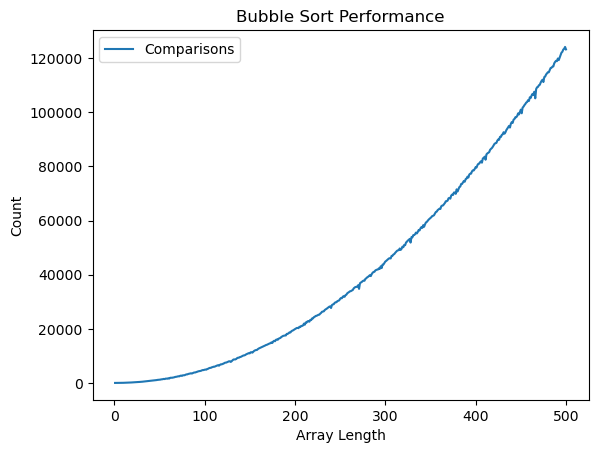

In [23]:
# Helper functions for demonstrating bubble sort performance.
# Takes a bit to run.
import matplotlib.pyplot as plt
import random

# Create a bunch of random lists with increasing n, and plot.
def generateRandomList(n):
    return [random.randint(0, 1000) for _ in range(n)]

# Plot these random lists
def plotBubbleSort(n):
    lengths = []
    comparisons = []
    swaps = []

    for i in range(1, n+1):
        arr = generateRandomList(i)
        length, comp, swap = bubbleSort(arr)
        lengths.append(len(length))
        comparisons.append(comp)
        swaps.append(swap)

    plt.plot(lengths, comparisons, label='Comparisons')
    plt.xlabel('Array Length')
    plt.ylabel('Count')
    plt.title('Bubble Sort Performance')
    plt.legend()
    plt.show()
    
plotBubbleSort(500)

Now, to demonstrate the differing number of swaps for different arrays (showing how the performance of BubbleSort can vary heavily with the current state of the list), all possible permutations of [5,4,3,2,1] will be BubbleSorted, showcasing the number of swaps required to sort each permutation. Itertools from the standard library is being used for this.

In [24]:
import itertools

# Create an array of arrays of all permutations of [5,4,3,2,1].

default = [5, 4, 3, 2, 1]
permutations = []

# Create all permutations of the default array using itertools. [12]
for i in itertools.permutations(default):
    permutations.append(list(i))

# Bubble Sort all of these permutations
for permutation in permutations:
    original = permutation.copy() # Keep the original for reference.
    arr, comparisons, swaps = bubbleSort(permutation)
    print(f"Permutation: {original}\t\tComparisons: {comparisons}\t\tSwaps: {swaps}")

Permutation: [5, 4, 3, 2, 1]		Comparisons: 10		Swaps: 10
Permutation: [5, 4, 3, 1, 2]		Comparisons: 10		Swaps: 9
Permutation: [5, 4, 2, 3, 1]		Comparisons: 10		Swaps: 9
Permutation: [5, 4, 2, 1, 3]		Comparisons: 10		Swaps: 8
Permutation: [5, 4, 1, 3, 2]		Comparisons: 10		Swaps: 8
Permutation: [5, 4, 1, 2, 3]		Comparisons: 9		Swaps: 7
Permutation: [5, 3, 4, 2, 1]		Comparisons: 10		Swaps: 9
Permutation: [5, 3, 4, 1, 2]		Comparisons: 10		Swaps: 8
Permutation: [5, 3, 2, 4, 1]		Comparisons: 10		Swaps: 8
Permutation: [5, 3, 2, 1, 4]		Comparisons: 10		Swaps: 7
Permutation: [5, 3, 1, 4, 2]		Comparisons: 10		Swaps: 7
Permutation: [5, 3, 1, 2, 4]		Comparisons: 9		Swaps: 6
Permutation: [5, 2, 4, 3, 1]		Comparisons: 10		Swaps: 8
Permutation: [5, 2, 4, 1, 3]		Comparisons: 10		Swaps: 7
Permutation: [5, 2, 3, 4, 1]		Comparisons: 10		Swaps: 7
Permutation: [5, 2, 3, 1, 4]		Comparisons: 10		Swaps: 6
Permutation: [5, 2, 1, 4, 3]		Comparisons: 9		Swaps: 6
Permutation: [5, 2, 1, 3, 4]		Comparisons: 9		Swap

As you can see, the number of swaps decreases the closer the array is to being sorted already. That is, the more it resembles [1,2,3,4,5], the fewer swaps it will take to complete.

<hr>

### References
- [1] Appending bits to the start of a binary number: https://stackoverflow.com/a/51678298
- [2] ord() in Python: https://docs.python.org/3.4/library/functions.html?highlight=ord#ord
- [3] Open file with encoding: https://stackoverflow.com/a/49375134
- [4] Splitting an array into even-sized chunks: https://www.geeksforgeeks.org/break-list-chunks-size-n-python/
- [5] Sieve of Eratosthenes: https://cp-algorithms.com/algebra/sieve-of-eratosthenes.html
- [6] Cube Roots Notes: https://github.com/ianmcloughlin/computational_theory/blob/main/materials/cube_roots.ipynb
- [7] Bubble Sort Explanation: https://www.w3schools.com/dsa/dsa_algo_bubblesort.php
- [8] Bubble Sort Time Complexity: https://www.w3schools.com/dsa/dsa_timecomplexity_bblsort.php
- [9] Sieve of Atkin: https://www.geeksforgeeks.org/sieve-of-atkin/
- [10] Using the HashLib library: https://github.com/ianmcloughlin/computational_theory/blob/main/materials/hash_functions.ipynb
- [11] HashCash Paper "A Denial of Service Counter-Measure": http://www.hashcash.org/hashcash.pdf
- [12] Permutations using Itertools: https://stackoverflow.com/a/104436